We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from SimpleCNN import SimpleCNN
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.95
OVERLAP_THRESHOLD = 0.30
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 45
DEVICE = 'cuda:0'

We know the results from model00 so we will not re-eval and jsut eval on our new model with 9% macro f1 !

In [3]:
# #load model00
# model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
# model = RegNet()
# model.load_state_dict(torch.load(model00_path))

# #get false postive count

# TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
#                                             confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
#                                             num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 497, Gyro: 497
Bout shape - Acc: 500, Gyro: 500
Bout shape - Acc: 612, Gyro: 612
Bout shape - Acc: 670, Gyro: 670
Bout shape - Acc: 754, Gyro: 754
Bout shape - Acc: 446, Gyro: 446
Bout shape - Acc: 559, Gyro: 559
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 435, Gyro: 435
Bout shape - Acc: 521, Gyro: 521
Bout shape - Acc: 468, Gyro: 468
Bout shape - Acc: 655, Gyro: 655
Bout shape - Acc: 655, Gyro: 655
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 409, Gyro: 409
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 447, Gyro: 447
Bout shape - Acc: 544, Gyro: 544
Bout shape - Acc: 906, Gyro: 906
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 608, Gyro: 608
Bout shape - Acc: 500, Gyro: 500
Bout shape - Acc: 449, Gyro: 449
Bout shape - Acc: 704, Gyro: 704
Bout shape - Acc: 495

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


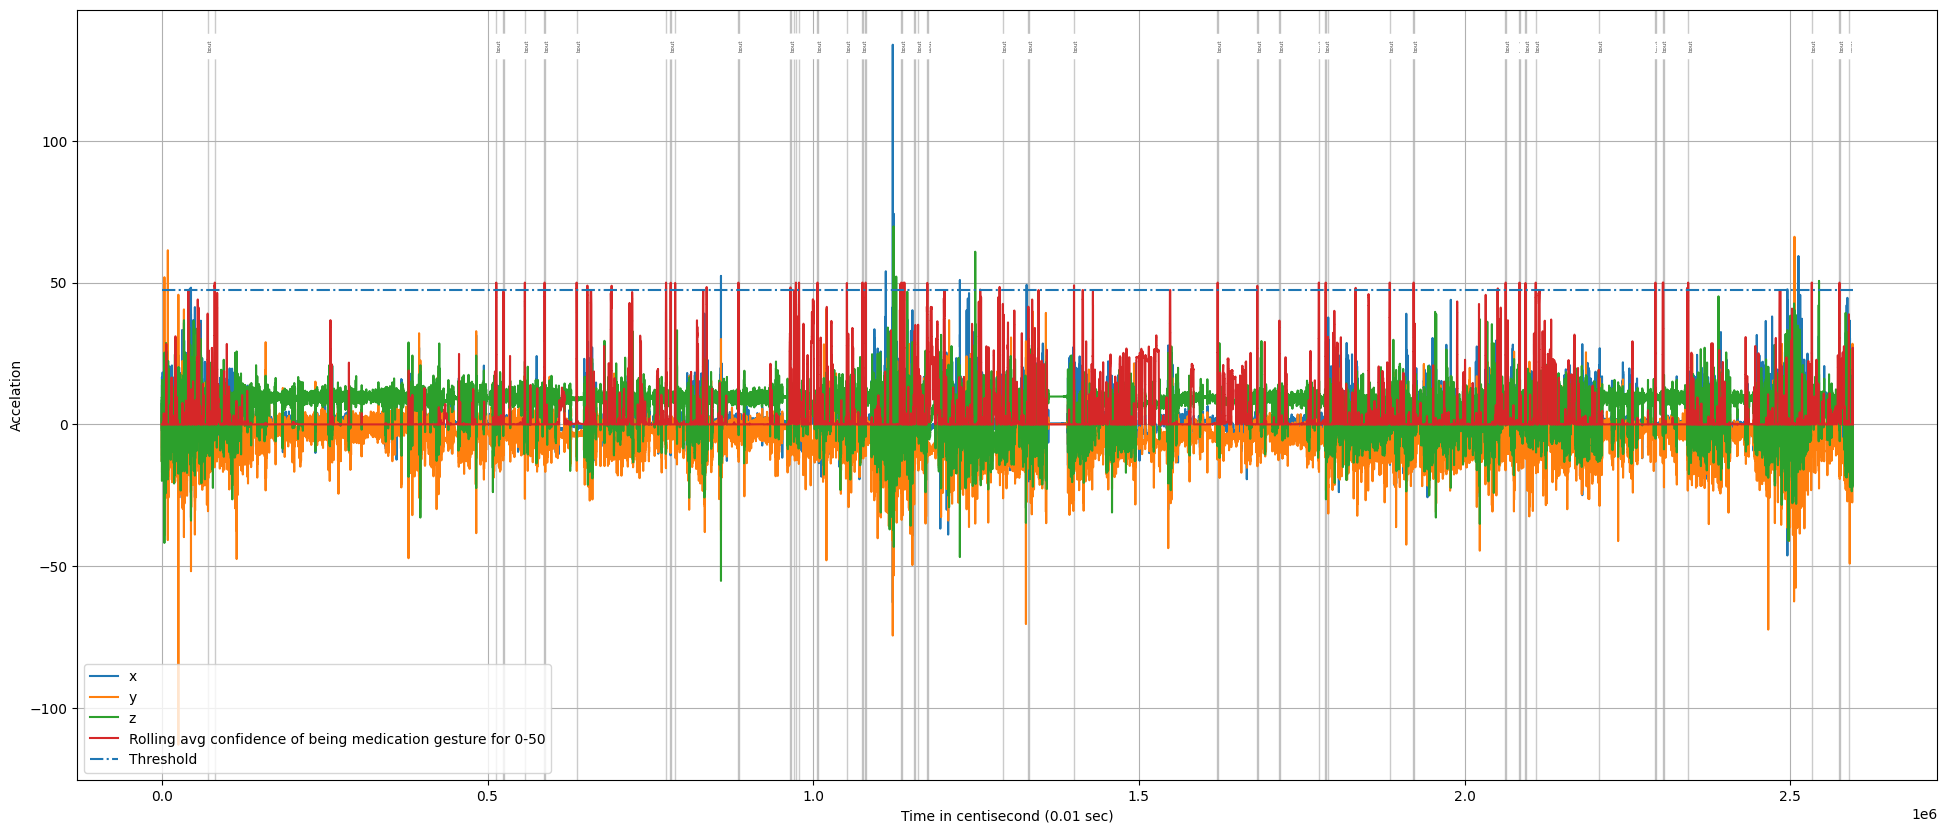

There are 11 FP's of 46 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.3)
FP's are at rate of 23.91%
TP's are at rate of 76.0870%
Out of 45 model found 35 (77.78)
Normalized on True


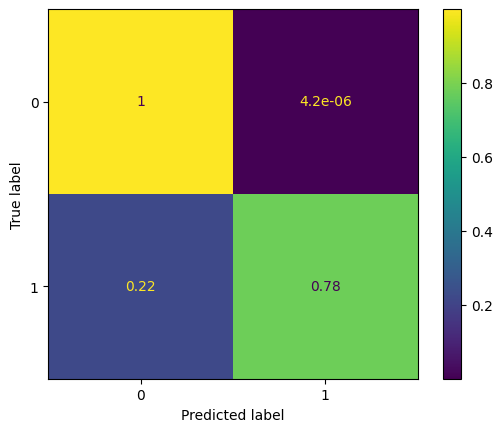

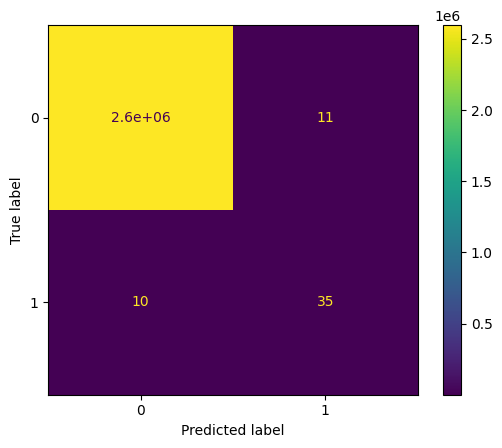

: 

In [ ]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week03/01_augment_loss_weights/92f1_Augmented_loss_weights_simpcnn_09posweight.pth'
model = SimpleCNN()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

LETS GO MODEL IS EVEN BETTER!